In [3]:
import numpy as np
from scipy.special import zeta
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
get_val = lambda r, gamma : (1 - r) ** (-1 / (gamma - 1))
n = 1000
N = 1000000
Ns = [10, 100, 1000, 10000, 100000, 1000000]
gamma = 5/2

In [3]:
array_lst = []
for N_i in Ns:
    samples = [-1 for i in range(n)]
    for i in range(n):
        sample_arr = np.zeros(N_i)
        for j in range(N_i):
             sample_arr[j] = round(get_val(np.random.uniform(), gamma))
        samples[i] = sample_arr
    array_lst.append(samples)

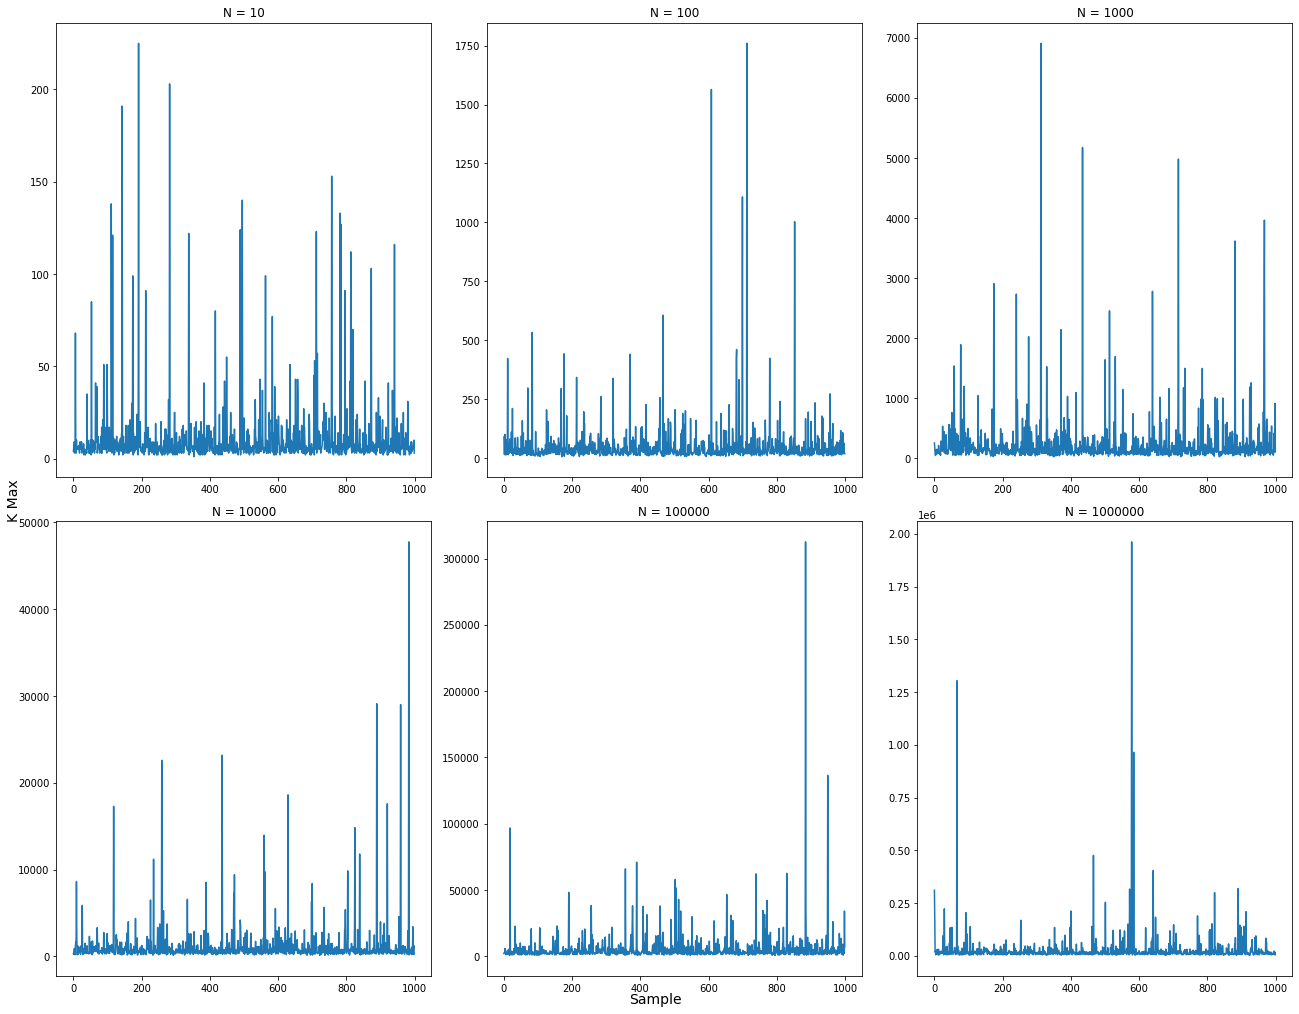

In [103]:

plt.rcParams["figure.figsize"] = [18, 14]
fig, axs = plt.subplots(2, 3)
i = 0
j = 0
for samples in array_lst:
    sample_mat = np.array(samples)
    sample_maxes = np.amax(sample_mat, axis=1)
    axs[i, j].plot(sample_maxes)
    axs[i, j].set_title("N = " + str(len(samples[0])))

    if j ==2:
        j = 0
        i += 1
    else:
        j += 1
fig.tight_layout()
fig.text(0.5, 0.000025, "Sample", ha='center',fontsize=14)
fig.text(0.000025, 0.5, "K Max", va='center', rotation='vertical',fontsize=14)
plt.show()

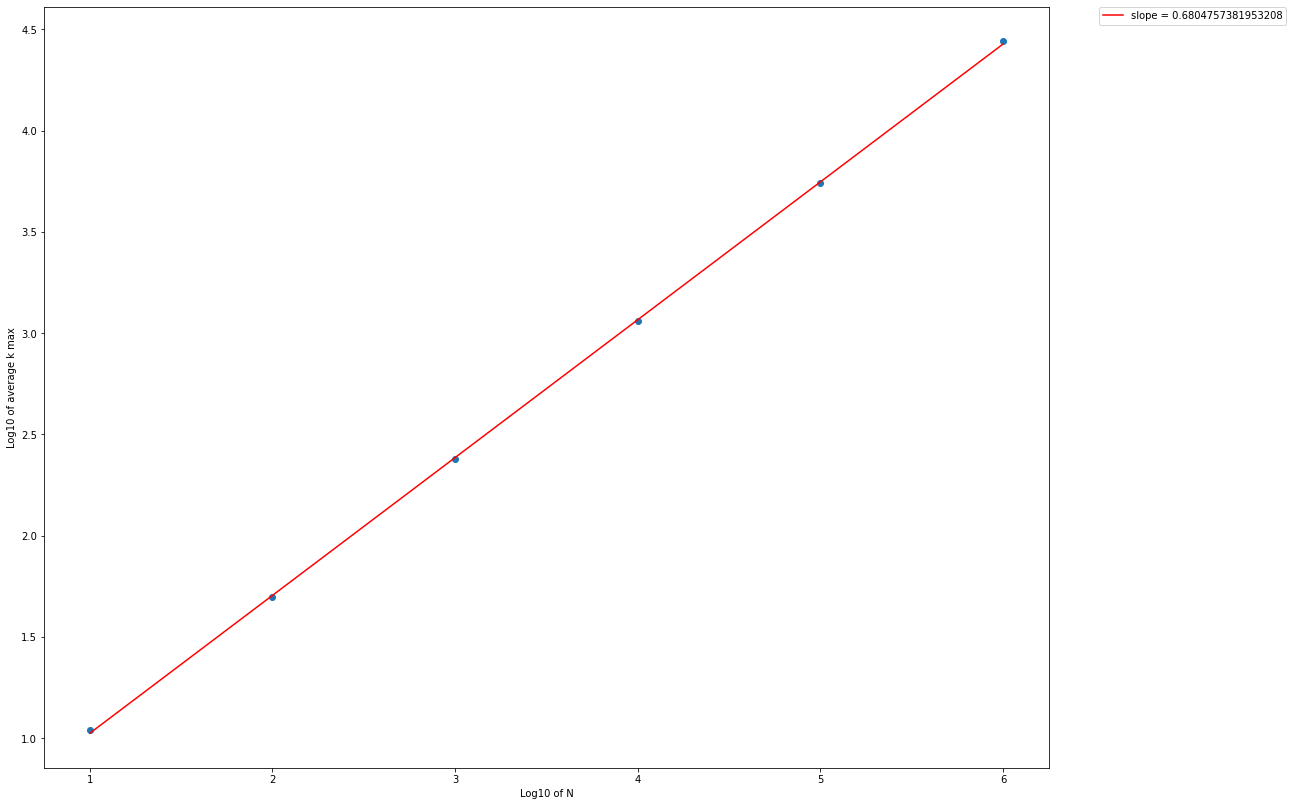

In [110]:
plt.rcParams["figure.figsize"] = [18, 14]
kmax_avgs = []
for samples in array_lst:
    sample_mat = np.array(samples)
    sample_maxes = np.amax(sample_mat, axis=1)
    kmax_avgs.append(sum(sample_maxes)/len(sample_maxes))

regr = stats.linregress(np.log10(Ns),np.log10(kmax_avgs))
plt.plot(np.log10(Ns), regr.slope*np.log10(Ns) + regr.intercept, color="red", label="slope = " + str(regr.slope))
plt.scatter(np.log10(Ns),np.log10(kmax_avgs))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Log10 of N")
plt.ylabel("Log10 of average k max")
plt.show()



2.0000858932820575
1.7285999999999748


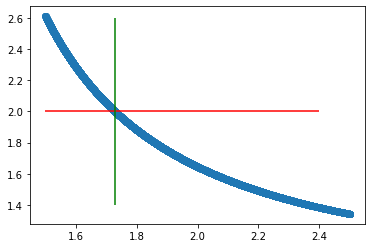

In [80]:
# Q4 A
x = np.arange(1.5, 2.5
, step = 0.0001)

zeta_array = np.array([zeta(val) for val in x])

diff = np.abs(zeta_array - 2)
closest_index = diff.argmin()
print(zeta_array[closest_index])
print(x[closest_index])

plt.scatter(x, zeta_array)
plt.hlines(2, 1.5, 2.4, colors="red")
plt.vlines(1.73, 1.4, 2.6, colors="green")
plt.show()
